In [1]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

In [20]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/train.csv")

### Some rename

In [26]:
df.Sex = df.Sex.replace({'male': 'Male', 'female': 'Female'})
df.Pclass = df.Pclass.replace({1:'First', 2:'Second',3:'Third'})
df.Survived = df.Survived.replace({0:'No', 1:'Yes'})

In [27]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
5,6,No,Third,"Moran, Mr. James",Male,NaN,0,0,330877,8.4583,NaN,Q
6,7,No,First,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,S
7,8,No,Third,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,S
8,9,Yes,Third,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,S
9,10,Yes,Second,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C


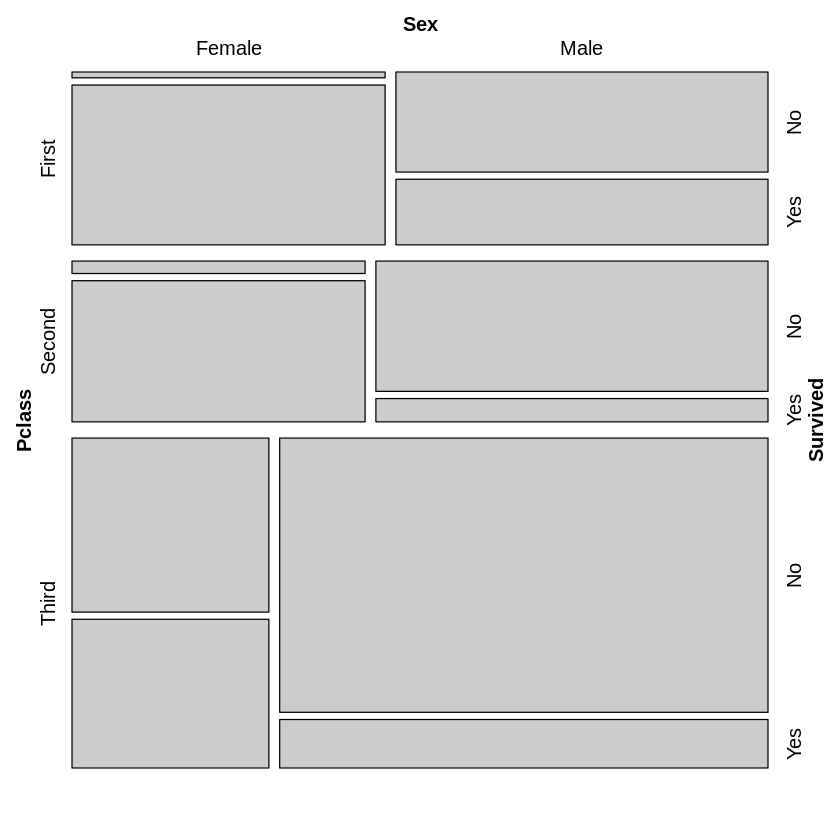

### My beautifull mosaic

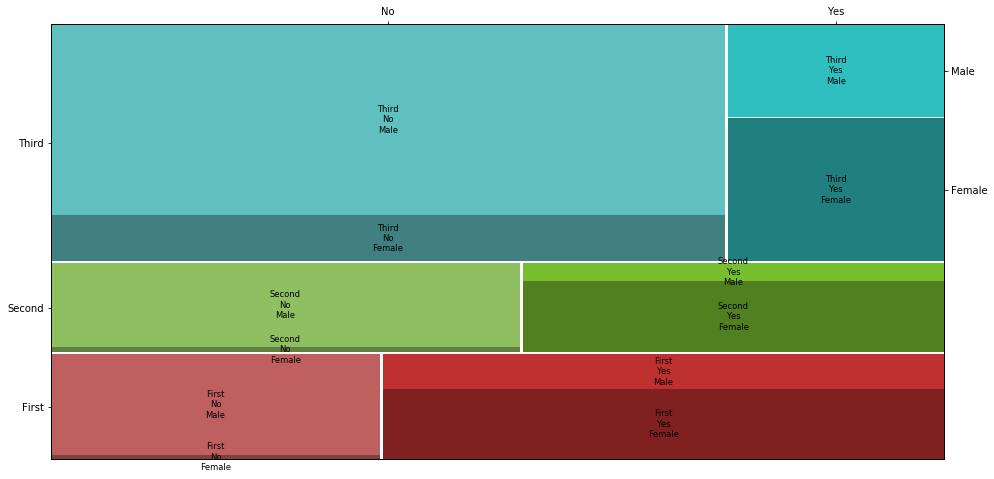

In [33]:
fig,ax = plt.subplots(figsize=(16 ,8))
my_plot = mosaic(pd.crosstab([df.Pclass, df.Survived], df.Sex).stack(), horizontal=False, ax=ax)#.reset_index(drop=True)

### Intercept only model

In [36]:
model = sm.formula.glm('Survived ~ 1', data=df, family = sm.families.Binomial()).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                         
=============================================================================================
Dep. Variable:     ['Survived[No]', 'Survived[Yes]']   No. Observations:                  891
Model:                                           GLM   Df Residuals:                      890
Model Family:                               Binomial   Df Model:                            0
Link Function:                                 logit   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -593.33
Date:                               Wed, 18 Dec 2019   Deviance:                       1186.7
Time:                                       23:24:53   Pearson chi2:                     891.
No. Iterations:                                    4                                         
Covariance Type:                           nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4733      0.069      6.870      0.000       0.338       0.608
==============================================================================
"""